In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
yulu_df=pd.read_csv("yulu_data.csv")
import warnings
warnings.filterwarnings('ignore')

In [63]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [64]:
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [65]:
yulu_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [66]:
yulu_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [67]:
yulu_df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [68]:
yulu_df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [69]:
yulu_df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [100]:
print("blank space for orientation")

blank space for orientation


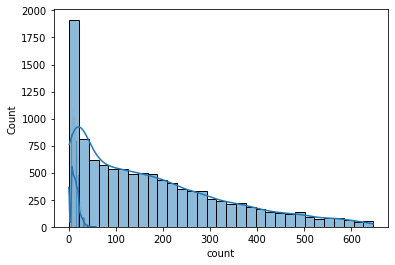

In [104]:
sns.histplot(data=yulu_df,x=yulu_df['count'],kde=True)
plt.show()

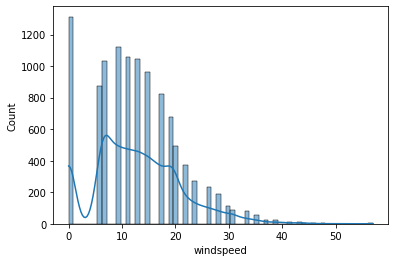

In [71]:
sns.histplot(data=yulu_df,x=yulu_df['windspeed'],kde=True)
plt.show()

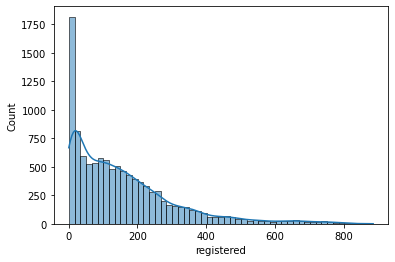

In [72]:
sns.histplot(data=yulu_df,x=yulu_df['registered'],kde=True)
plt.show()

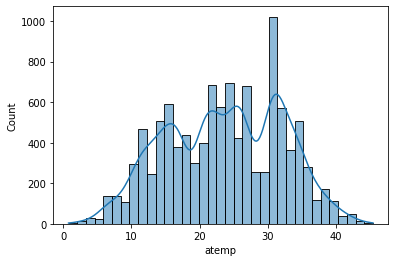

In [73]:
sns.histplot(data=yulu_df,x=yulu_df['atemp'],kde=True)
plt.show()

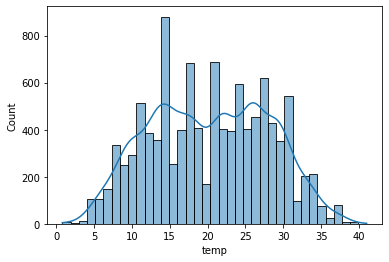

In [74]:
sns.histplot(data=yulu_df,x=yulu_df['temp'],kde=True)
plt.show()

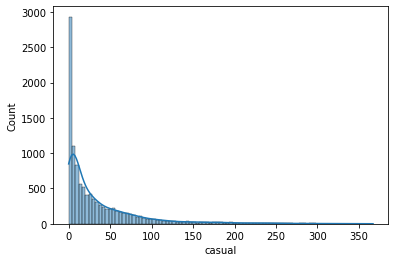

In [75]:
sns.histplot(data=yulu_df,x=yulu_df['casual'],kde=True)
plt.show()

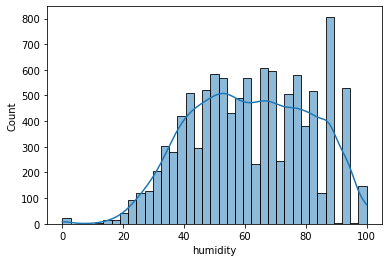

In [76]:
sns.histplot(data=yulu_df,x=yulu_df['humidity'],kde=True)
plt.show()

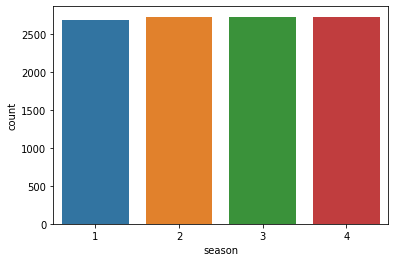

In [77]:
sns.countplot(data=yulu_df,x='season')
plt.show()

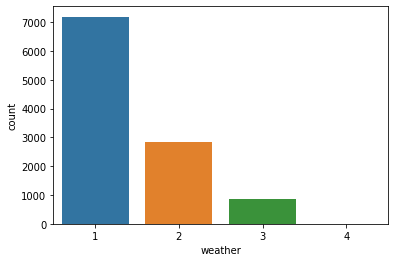

In [78]:
sns.countplot(data=yulu_df,x='weather')
plt.show()

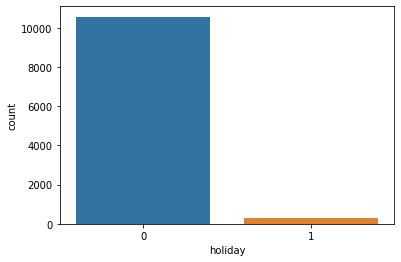

In [79]:
sns.countplot(data=yulu_df,x='holiday')
plt.show()

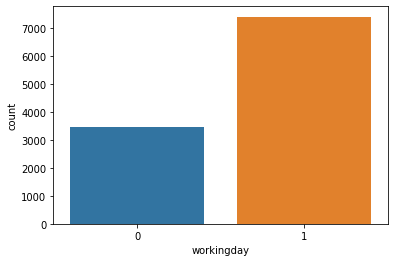

In [80]:
sns.countplot(data=yulu_df,x='workingday')
plt.show()

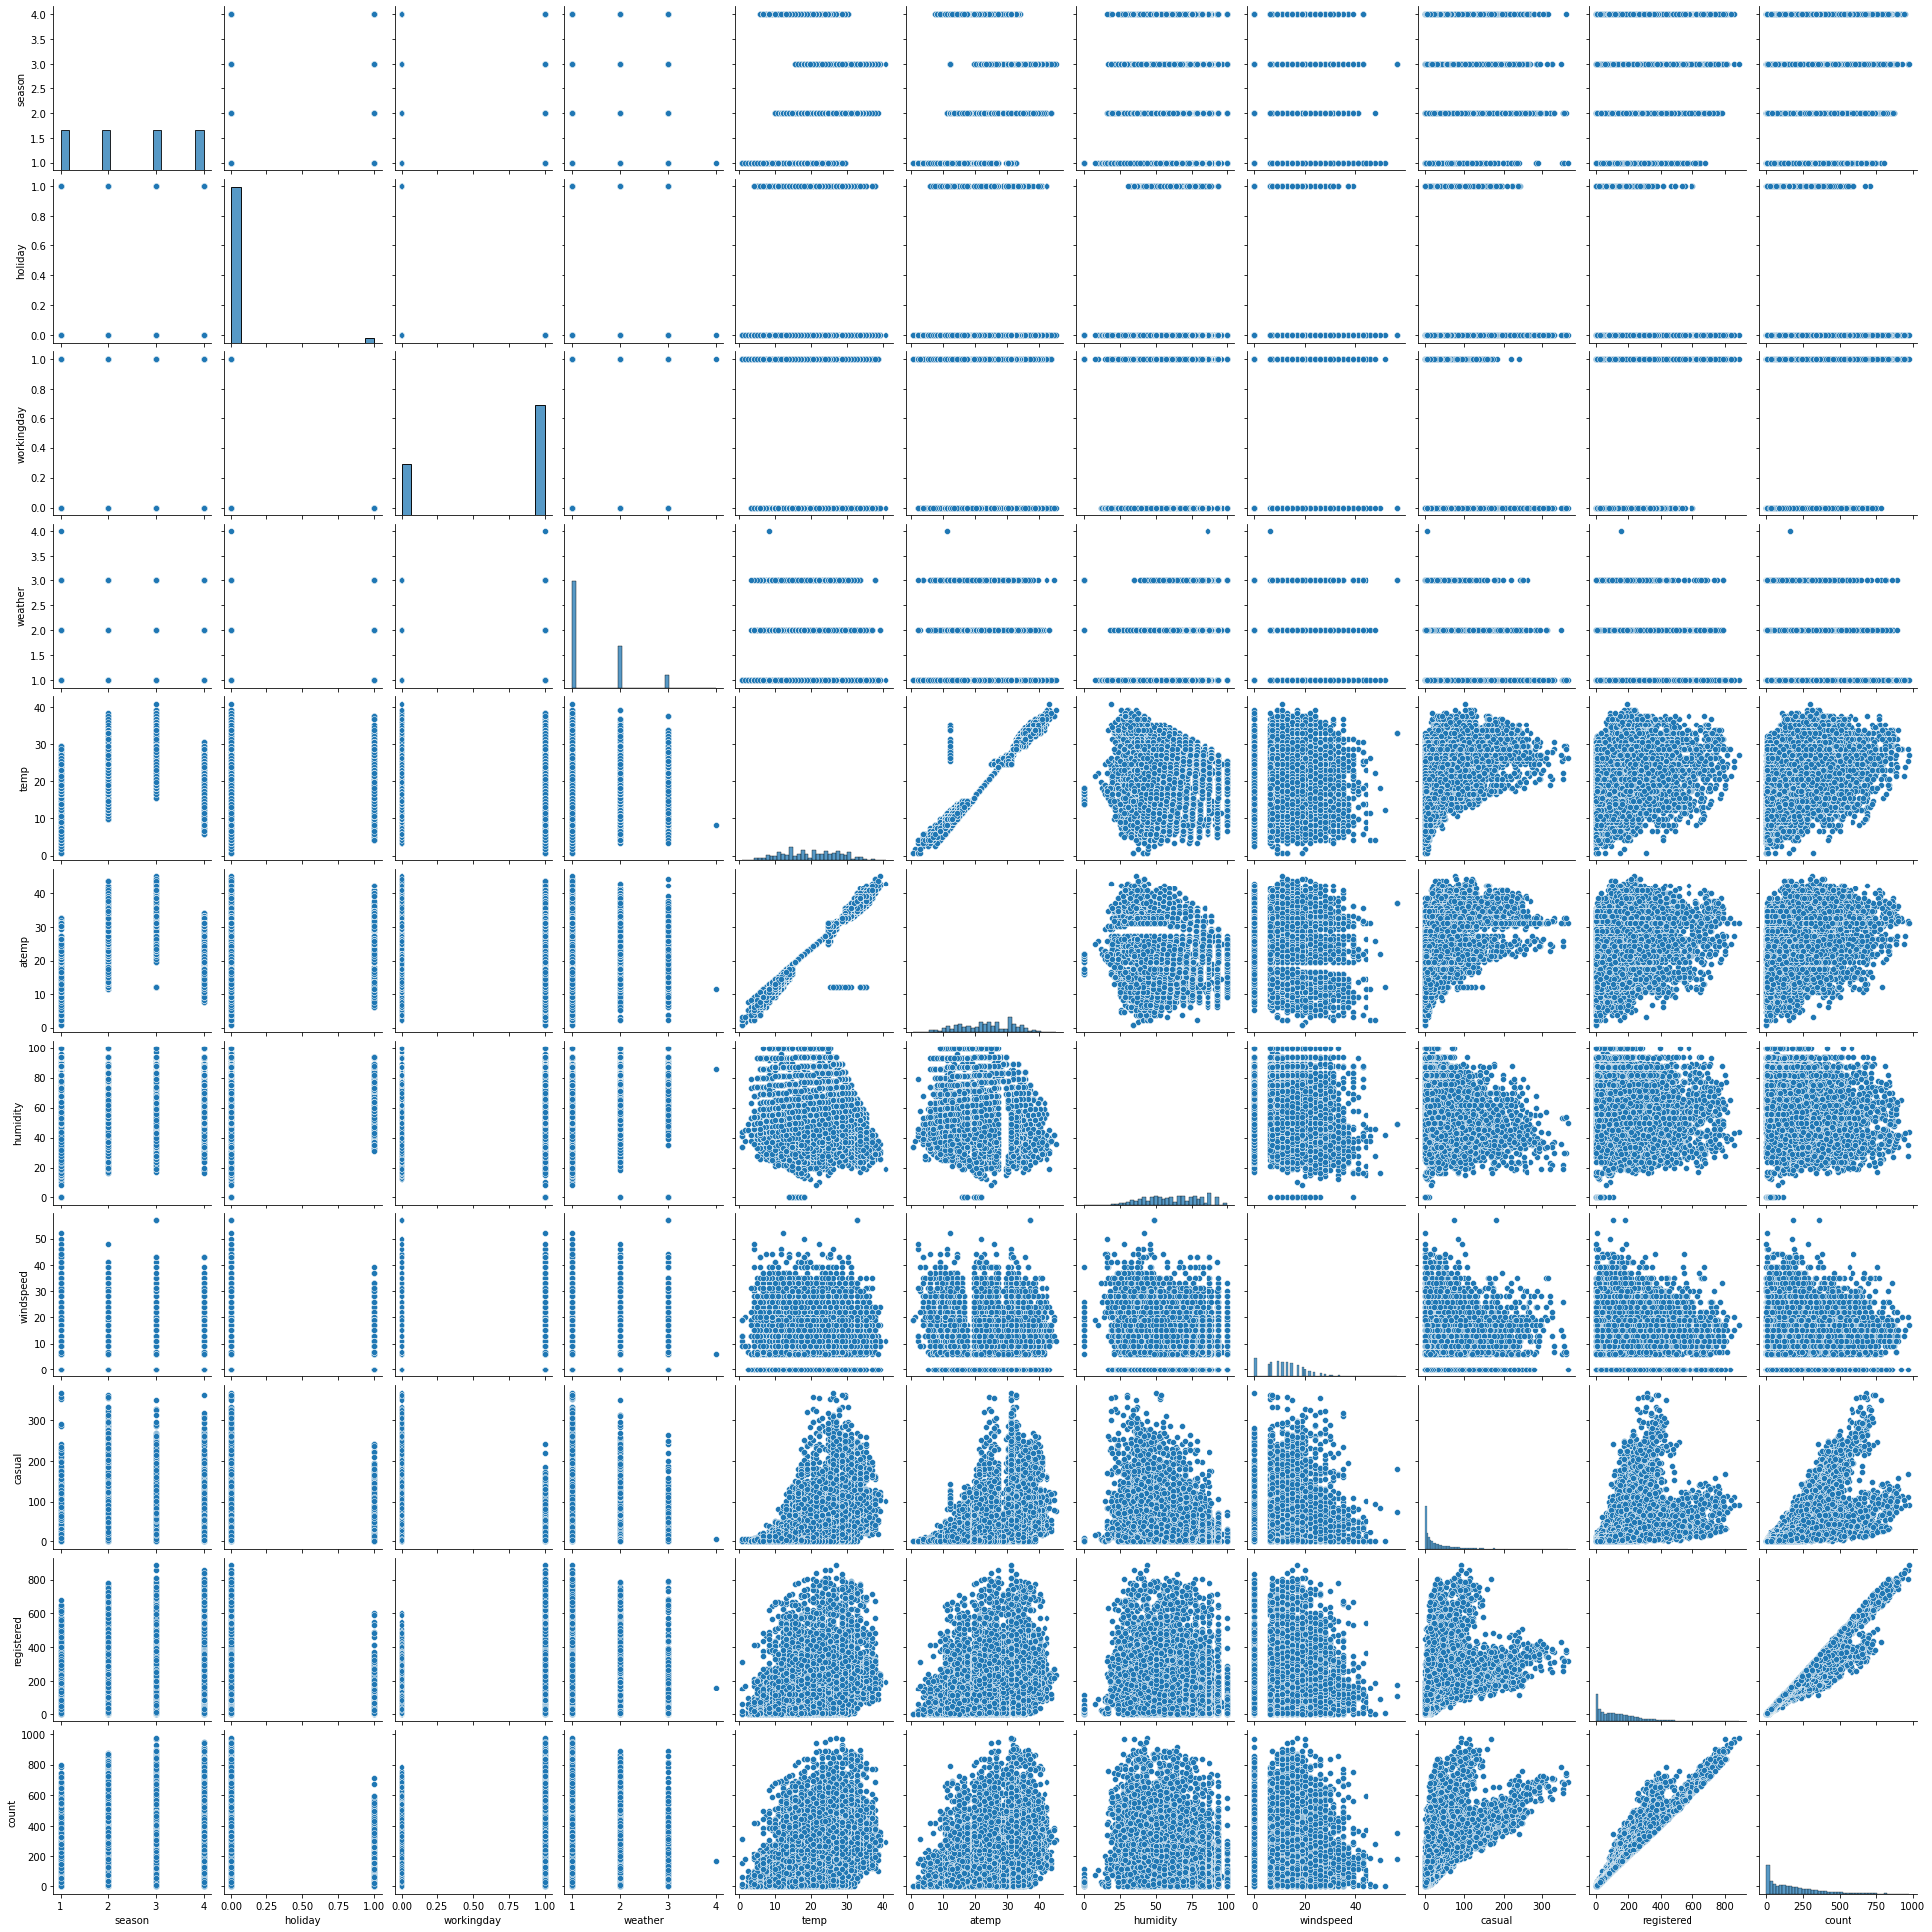

In [81]:
sns.pairplot(yulu_df)
plt.show()

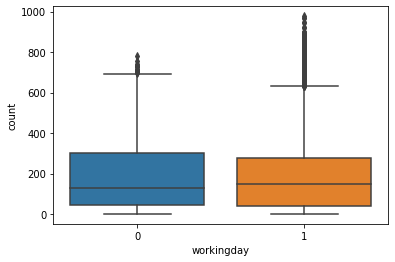

In [82]:
sns.boxplot(x='workingday', y='count', data =yulu_df)
plt.show()

In [83]:
q1=yulu_df['count'].quantile(0.25)
q3=yulu_df['count'].quantile(0.75)
iqr=q3-q1

yulu_df=yulu_df[(yulu_df['count']>(q1-1.5*iqr) ) & (yulu_df['count']<(q3+1.5*iqr))]
yulu_df.shape

(10583, 12)

In [84]:
yulu_df.workingday.value_counts()

1    7161
0    3422
Name: workingday, dtype: int64

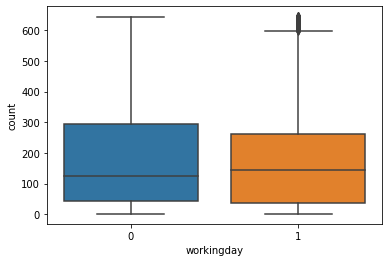

In [85]:
sns.boxplot(x='workingday', y='count', data =yulu_df)
plt.show()

Step 1: Define the null and alternate hypotheses

$H_0:$ The count on weekday is equal to the count on weekend.<br>
$H_a:$ The count on weekday is greater than count on weekend.<br>
Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page
respectively.
Mathematically, the above formulated hypotheses can be written as:
$H_0: \mu_1 = \mu_2$
$H_a: \mu_1 > \mu_2$


Step 2: Select appropriate test

This is a one-tailed test concerning two population means from two independent populations. As
the population standard deviations are unknown, the two sample independent t-test will be the
appropriate test for this problem.

Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

Step 4: Collect and prepare data

In [86]:
weekday = yulu_df[yulu_df['workingday'] == 1]['count'].sample(3422)
weekend = yulu_df[yulu_df['workingday'] == 0]['count'].sample(3422)
print('The sample standard deviation of the count on weekday is:', round(weekday.std(),2))
print('The sample standard deviation of the count on weekend is:', round(weekend.std(),2))


The sample standard deviation of the count on weekday is: 154.18
The sample standard deviation of the count on weekend is: 163.78


As the sample standard deviations are different, the population standard deviations may be
assumed to be different.

Step 5: Calculate the p-value

In [87]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(weekday, weekend, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)
#The p-value is 0.9962219969001282
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject null hypothesis')

The p-value is 0.8618445930162859
As the p-value 0.8618445930162859 is greater than the level of significance, we fail to reject null hypothesis


Is the demand of electric cycles same for different weather?

In [88]:
yulu_df.weather.value_counts()


1    6962
2    2770
3     850
4       1
Name: weather, dtype: int64

In [89]:
yulu_df=yulu_df[~(yulu_df['weather']==4)]
w1 = yulu_df[yulu_df['weather'] == 1]['count'].sample(850)
w2= yulu_df[yulu_df['weather'] == 2]['count'].sample(850)
w3 = yulu_df[yulu_df['weather'] == 3]['count'].sample(850)
yulu_df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


Define the null and alternate hypotheses
<br>
$H_0:$ The mean count in different weather are equal.<br>
$H_a:$ The mean count in different weather are different<br>

Identifying test to use<br>

One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.
For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
For equality of variance, Levene test is applied to the response variable.

Shapiro-Wilk’s test<br>
$H_0:$ Count follows normal distribution<br>
$H_a:$ Count doesn't follow normal distribution


The p-value is 0.0


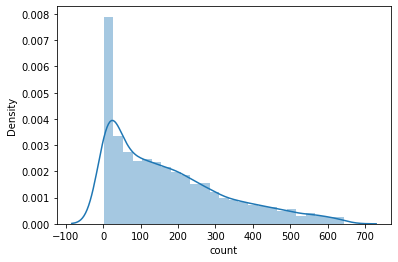

In [90]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro
# find the p-value
w, p_value = shapiro(yulu_df['count'].sample(4999)) 
print('The p-value is', p_value)

sns.distplot(yulu_df['count'].sample(4999))
plt.show()

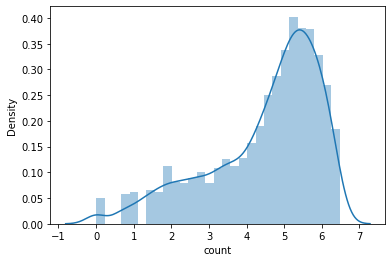

In [91]:
sns.distplot(np.log(yulu_df['count'].sample(4999)))
plt.show()

Levene’s test<br>

$H_0$: All the count variances are equal <br>

$H_a$: At least one variance is different from the rest

In [92]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( w1, w2, w3)
# find the p-value
print('The p-value is', p_value)

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject null hypothesis')
print(w1.var(), w2.var(), w3.var())

The p-value is 8.288617016927644e-22
As the p-value 8.288617016927644e-22 is less than the level of significance, we reject null hypothesis
26859.819463728956 22180.67847432966 14697.534623432408


ANOVA

In [93]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(w1,w2,w3)
# print the p-value
print('The p-value is', p_value)

The p-value is 4.655544580344998e-31


In [94]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject null hypothesis')

As the p-value 4.655544580344998e-31 is less than the level of significance, we reject null hypothesis


Hence, weather affects counts